### Zadanie 2

In [1]:
#importowanie potrzebnych pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Funkcje ceny opcji dla opcji Call i Put American-style (J Hull)
def call_option_price(S, K, T, r, sigma, H=0):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    d3 = (np.log(H**2 / (S * K)) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d4 = d3 - sigma * np.sqrt(T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    call_price -= (H / S)**(2 * r / sigma**2) * (S * norm.cdf(d3) - K * np.exp(-r * T) * norm.cdf(d4))

    return call_price

def put_option_price(S, K, T, r, sigma, H=0):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    d3 = (np.log(H**2 / (S * K)) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d4 = d3 - sigma * np.sqrt(T)

    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    put_price += (H / S)**(2 * r / sigma**2) * (K * np.exp(-r * T) * norm.cdf(-d4) - S * norm.cdf(-d3))

    return put_price

# Funkcje wypłaty opcji Call i Put
def call_option_payoff(S, K):
    return np.maximum(S - K, 0)

def put_option_payoff(S, K):
    return np.maximum(K - S, 0)

# Domyślne wartości parametrów opcji
ticker = "BTC-EUR"
stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

expiration_date = datetime(2024, 4, 30) 
current_date = datetime.now()

T = (expiration_date - current_date).days / 365 # Termin zapadalności
S = 100 # cena instrumentu bazowego
K = 100 # cena wykonania opcji
r = 0.05 # stopa wolna od ryzyka
sigma = 0.2 # zmienność instrumentu bazowego

[*********************100%%**********************]  1 of 1 completed


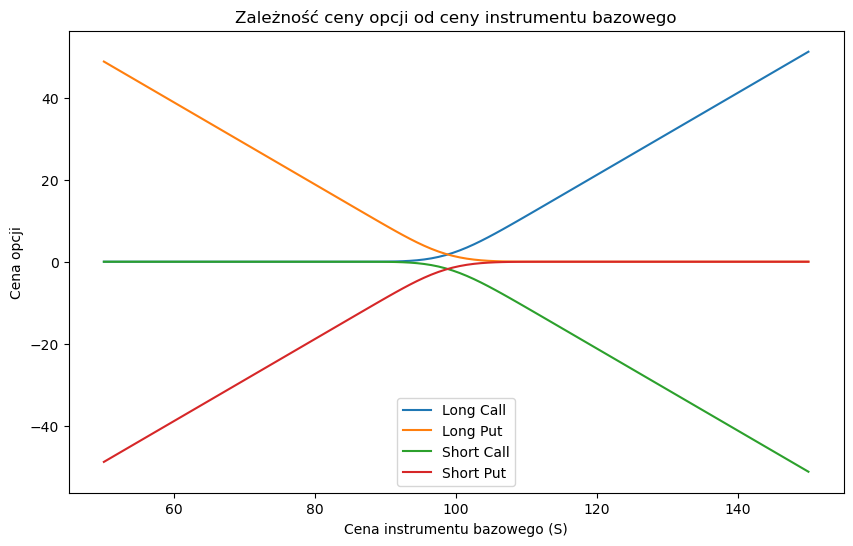

In [3]:
#przedstawienie na wykresie zależności ceny opcji od ceny instrumentu bazowego
S_range = np.linspace(50, 150, 100)

plt.figure(figsize=(10, 6))

plt.plot(S_range, call_option_price(S_range, K, r, T, sigma), label='Long Call')
plt.plot(S_range, put_option_price(S_range, K, r, T, sigma), label='Long Put')
plt.plot(S_range, -call_option_price(S_range, K, r, T, sigma), label='Short Call')
plt.plot(S_range, -put_option_price(S_range, K, r, T, sigma), label='Short Put')

plt.title('Zależność ceny opcji od ceny instrumentu bazowego')
plt.xlabel('Cena instrumentu bazowego (S)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/barrier/a.png')
plt.show()

Na wykresie widać że w przypadku Long Call, im droższy instrument bazowy tym lepiej. Dla Long Put sytuacja jest odwrotna, tańszy instrument bazowy lepiej się sprawdza. Shorty zakładają dopłacanie do opcji w przypadku zbyt niskich lub wysokich wartości instrumentów bazowych.

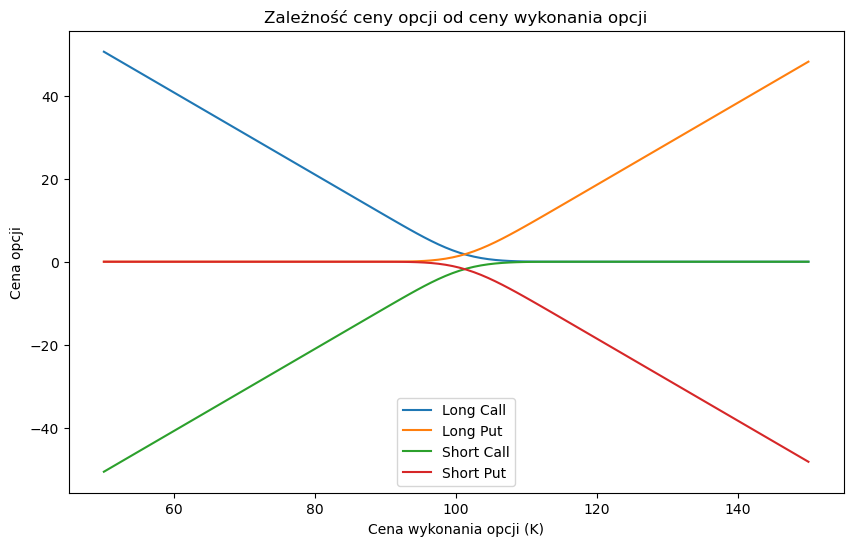

In [4]:
K_range = np.linspace(50, 150, 100)

plt.figure(figsize=(10, 6))

plt.plot(K_range, call_option_price(S, K_range, r, T, sigma), label='Long Call')
plt.plot(K_range, put_option_price(S, K_range, r, T, sigma), label='Long Put')
plt.plot(K_range, -call_option_price(S, K_range, r, T, sigma), label='Short Call')
plt.plot(K_range, -put_option_price(S, K_range, r, T, sigma), label='Short Put')

plt.title('Zależność ceny opcji od ceny wykonania opcji')
plt.xlabel('Cena wykonania opcji (K)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/barrier/b.png')
plt.show()

Podobnie jak wcześniej shorty radzą sobie słabo jeśli chodzi o cenę opcji dla skrajnych cen wykonań opcji. Longi również pokazują analogiczne zależności jak w poprzednim przykładzie.

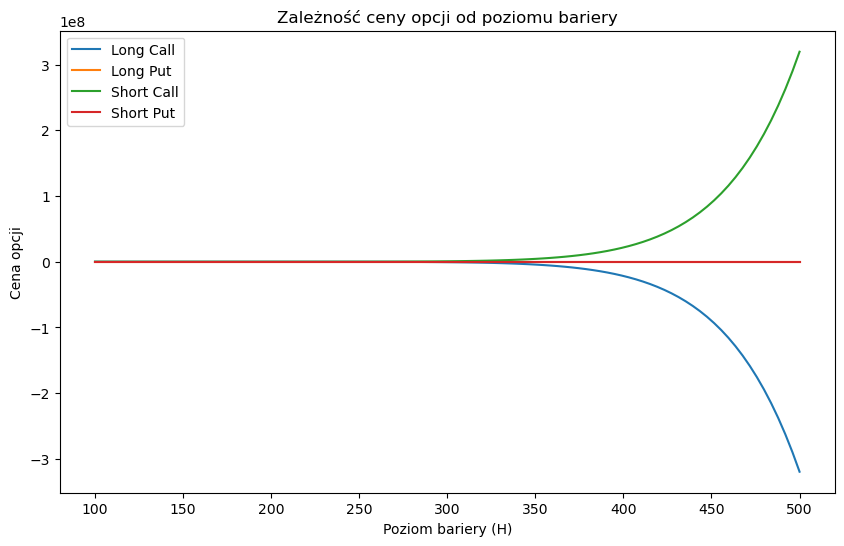

In [5]:
H_range = np.linspace(100, 500, 100)

plt.figure(figsize=(10, 6))

plt.plot(H_range, call_option_price(S, K, r, T, sigma, H_range), label='Long Call')
plt.plot(H_range, put_option_price(S, K, r, T, sigma, H_range), label='Long Put')
plt.plot(H_range, -call_option_price(S, K, r, T, sigma, H_range), label='Short Call')
plt.plot(H_range, -put_option_price(S, K, r, T, sigma, H_range), label='Short Put')

plt.title('Zależność ceny opcji od poziomu bariery')
plt.xlabel('Poziom bariery (H)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/barrier/c.png')
plt.show()


Na tym przykładzie widać że Calle mocno reagują na poziom bariery, natomiast shorty pozostają na stałym poziomie.

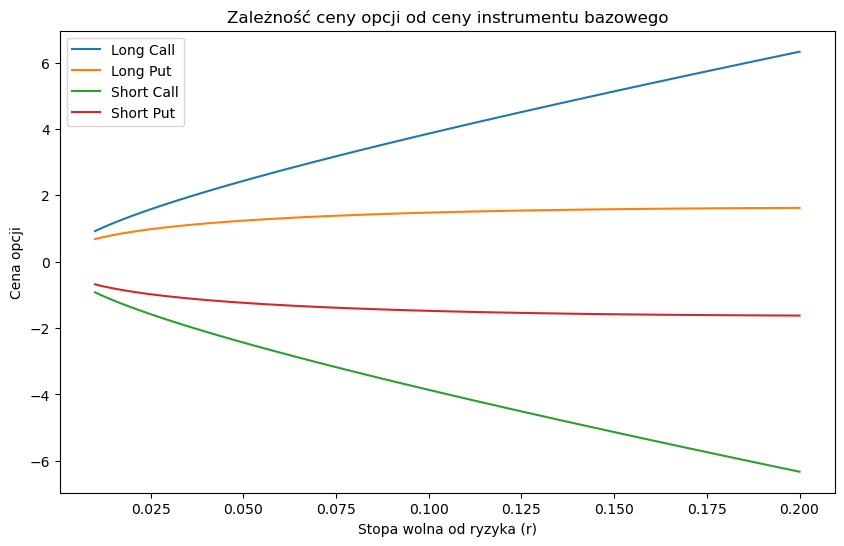

In [6]:
r_range = np.linspace(0.01, 0.2, 100)

plt.figure(figsize=(10, 6))

plt.plot(r_range, call_option_price(S, K, r_range, T, sigma), label='Long Call')
plt.plot(r_range, put_option_price(S, K, r_range, T, sigma), label='Long Put')
plt.plot(r_range, -call_option_price(S, K, r_range, T, sigma), label='Short Call')
plt.plot(r_range, -put_option_price(S, K, r_range, T, sigma), label='Short Put')

plt.title('Zależność ceny opcji od ceny instrumentu bazowego')
plt.xlabel('Stopa wolna od ryzyka (r)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/barrier/d.png')
plt.show()


Stopa wolna od ryzyka w ciekawy sposób wpływa na ceny opcji, w każdym przypadku im wyższa stopa tym bardziej cena opcji odbiega od zera, jest to natomiast gwałtowniejsze i bardziej widoczne w przypadku Calli.

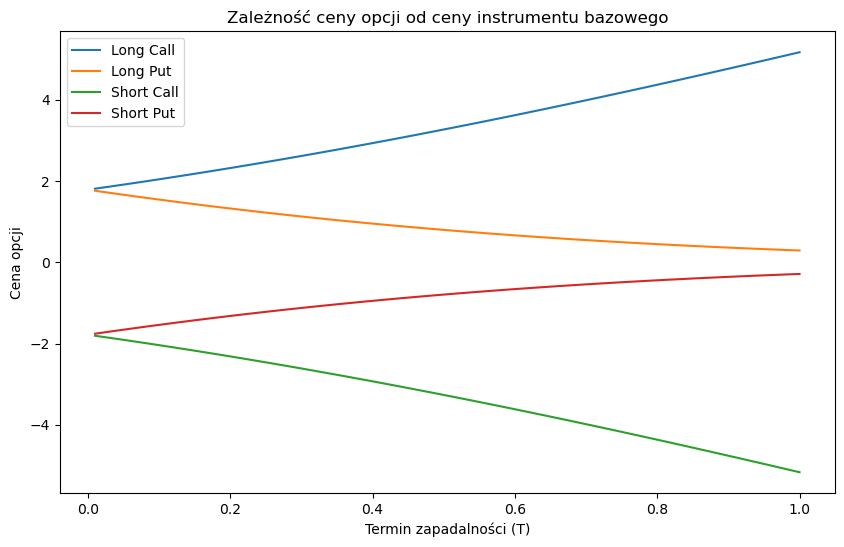

In [7]:
T_range = np.linspace(0.01, 1, 100)

plt.figure(figsize=(10, 6))

plt.plot(T_range, call_option_price(S, K, r, T_range, sigma), label='Long Call')
plt.plot(T_range, put_option_price(S, K, r, T_range, sigma), label='Long Put')
plt.plot(T_range, -call_option_price(S, K, r, T_range, sigma), label='Short Call')
plt.plot(T_range, -put_option_price(S, K, r, T_range, sigma), label='Short Put')

plt.title('Zależność ceny opcji od ceny instrumentu bazowego')
plt.xlabel('Termin zapadalności (T)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/barrier/e.png')
plt.show()


Jeśli chodzi o zależność od terminu zapadalności to Calle odbiegają od ceny opcji = 0, Puty natomiast zbiegają do niej.

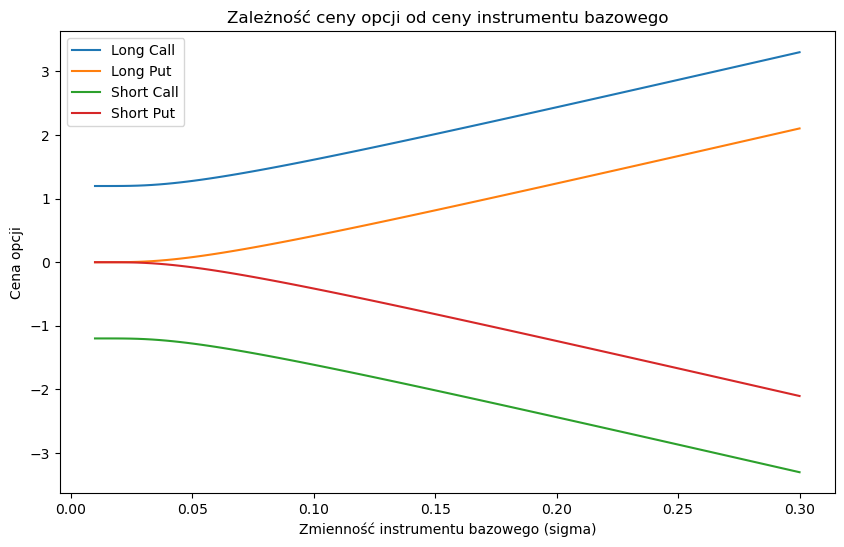

In [8]:
sigma_range = np.linspace(0.01, 0.3, 100)

plt.figure(figsize=(10, 6))

plt.plot(sigma_range, call_option_price(S, K, r, T, sigma_range), label='Long Call')
plt.plot(sigma_range, put_option_price(S, K, r, T, sigma_range), label='Long Put')
plt.plot(sigma_range, -call_option_price(S, K, r, T, sigma_range), label='Short Call')
plt.plot(sigma_range, -put_option_price(S, K, r, T, sigma_range), label='Short Put')

plt.title('Zależność ceny opcji od ceny instrumentu bazowego')
plt.xlabel('Zmienność instrumentu bazowego (sigma)')
plt.ylabel('Cena opcji')
plt.legend()

plt.savefig('./images/barrier/f.png')
plt.show()

W przypadku zmienności instrumentu bazowego we wszystkich przypadkach cena opcji odbiega od wartości 0.

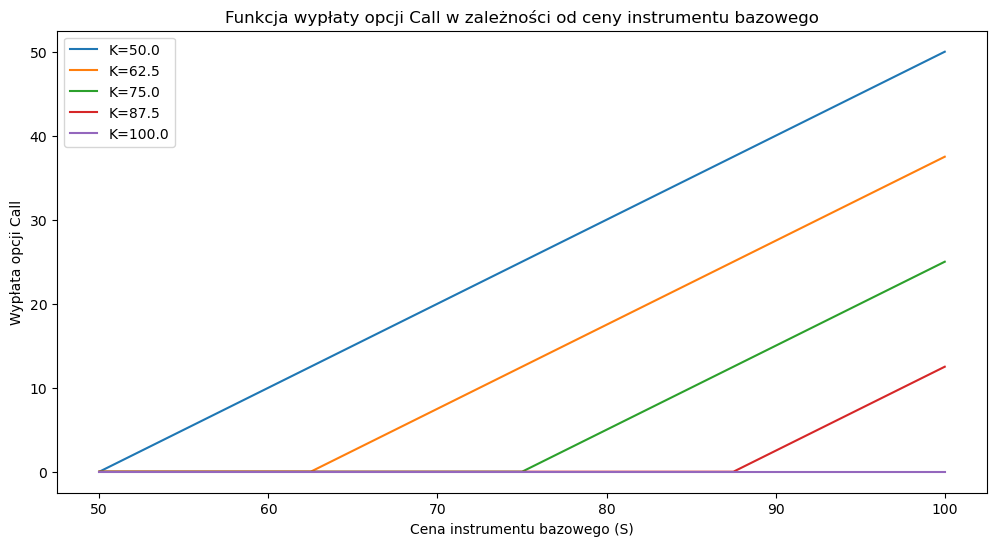

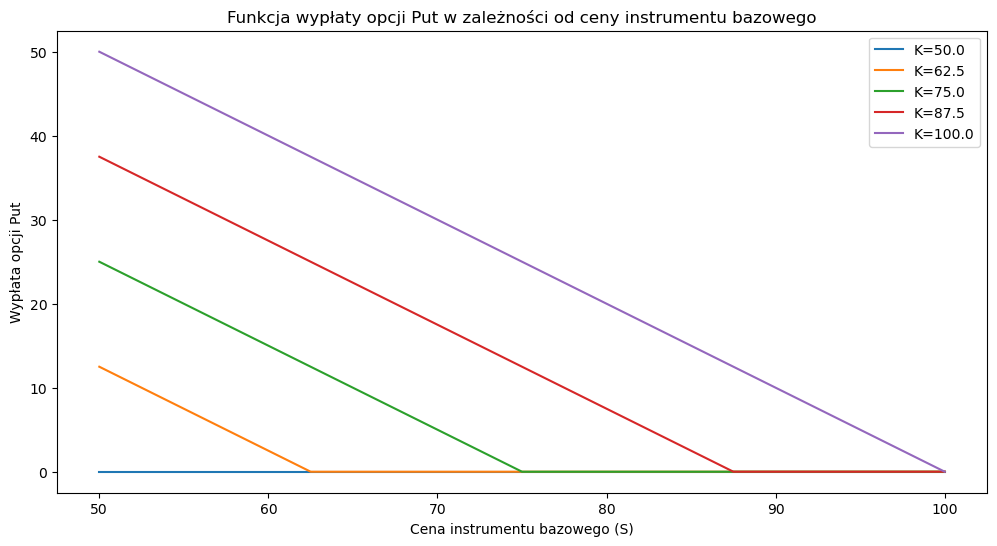

In [9]:
#przedstawienie na wykresach cen opcji w zależności od ceny instrumentu bazowego i rodzaju opcji Call/Put
S_range = np.linspace(50, 100, 5)  
K_range = np.linspace(50, 100, 5) 

call_payoff = np.zeros((len(K_range), len(S_range)))
for i, K in enumerate(K_range):
    call_payoff[i, :] = call_option_payoff(S_range, K)

put_payoff = np.zeros((len(K_range), len(S_range)))
for i, K in enumerate(K_range):
    put_payoff[i, :] = put_option_payoff(S_range, K)

# Call
plt.figure(figsize=(12, 6))
for i, K in enumerate(K_range):
    plt.plot(S_range, call_payoff[i, :], label=f'K={K}')

plt.title('Funkcja wypłaty opcji Call w zależności od ceny instrumentu bazowego')
plt.xlabel('Cena instrumentu bazowego (S)')
plt.ylabel('Wypłata opcji Call')
plt.legend()
plt.savefig('./images/barrier/w_call.png')
plt.show()

# Put
plt.figure(figsize=(12, 6))
for i, K in enumerate(K_range):
    plt.plot(S_range, put_payoff[i, :], label=f'K={K}')

plt.title('Funkcja wypłaty opcji Put w zależności od ceny instrumentu bazowego')
plt.xlabel('Cena instrumentu bazowego (S)')
plt.ylabel('Wypłata opcji Put')
plt.legend()
plt.savefig('./images/barrier/w_put.png')
plt.show()
